In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import os
import textwrap

In [166]:
directory = "D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/SAP"

data_dimensoes = "dimensoes_alunos.csv"
data_fatores = "fatores_alunos.csv"

dimensoes = os.path.join(directory, data_dimensoes)
fatores = os.path.join(directory, data_fatores)

tb_dimensoes = pd.read_csv(dimensoes)
tb_fatores = pd.read_csv(fatores)

tb_fatores_copy = tb_fatores.drop(columns=['id_raca_etnia', 'id_renda_familiar', 'sexo', 'id_turma', 'id_escola', 'etnia', 'renda', 'nome_turma', 'modo_ensino', 'etapa_ensino',
                                      'ano_turma', 'id_escola.1', 'nome_escola', 'endereco', 'restricao_de_atendimento', 'localidade_diferenciada', 'categoria_administrativa',
                                      'telefone', 'dependencia_administrativa', 'categoria_escola', 'conveniada_poder_publico', 'regulamentacao_pelo_conselho', 'porte_da_escola',
                                      'modalidade_ensino', 'outras_ofertas_educacionais', 'latitude', 'longitude', 'uf', 'municipio', 'localizacao', 'data_criacao',
                                      'nome_aluno', 'id', 'id_aluno.1', 'created_date', 'updated_date'])

td_dimensoes_fatores = pd.merge(tb_dimensoes, tb_fatores_copy, on='id_aluno', suffixes=('', ''))

if (td_dimensoes_fatores['id_aluno'] == td_dimensoes_fatores['id_aluno.1']).all():
    td_dimensoes_fatores = td_dimensoes_fatores.drop(columns=['id_aluno.1'])

td_dimensoes_fatores['ano_turma'] = td_dimensoes_fatores['ano_turma'].str.replace('º', '°')

br_states = gpd.read_file('../../Databases/Geografia/brazil_geo.json')

C:\Users\daniv\AppData\Local\Temp\ipykernel_18592\2417075229.py:9: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_dimensoes = pd.read_csv(dimensoes)
C:\Users\daniv\AppData\Local\Temp\ipykernel_18592\2417075229.py:10: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_fatores = pd.read_csv(fatores)


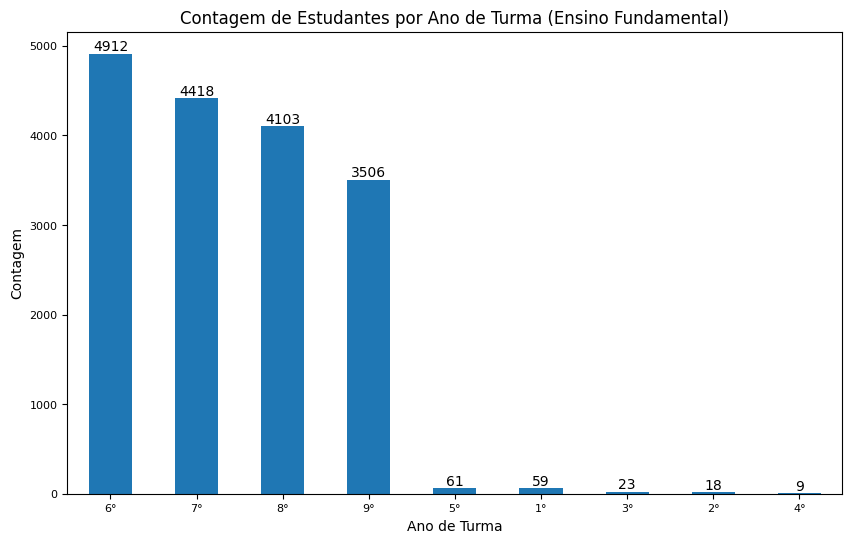

In [14]:
contagem_modalidades = td_dimensoes_fatores['ano_turma'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Contagem de Estudantes por Ano de Turma (Ensino Fundamental)') 
plt.xlabel('Ano de Turma') 
plt.ylabel('Contagem') 
plt.xticks(rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

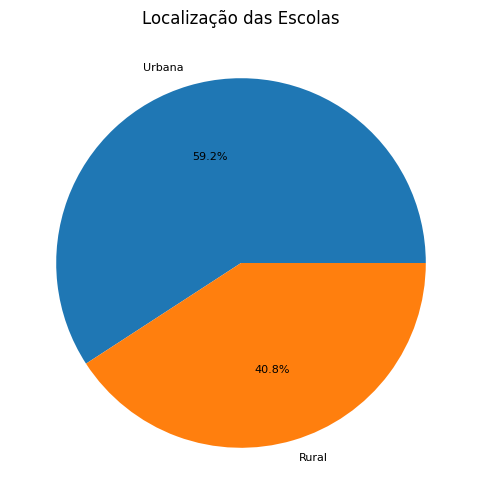

In [15]:
contagem_modalidades = td_dimensoes_fatores['localizacao'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Localização das Escolas')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

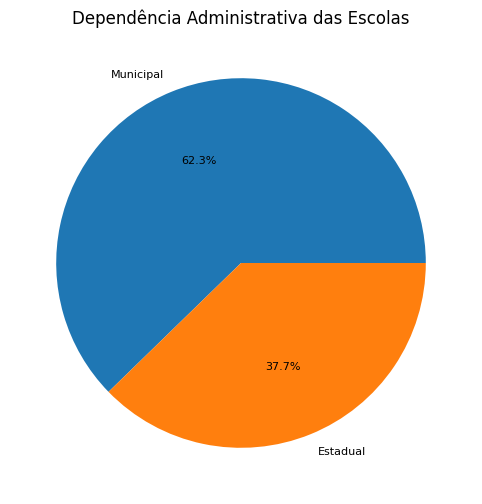

In [18]:
contagem_modalidades = td_dimensoes_fatores['dependencia_administrativa'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Dependência Administrativa das Escolas')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

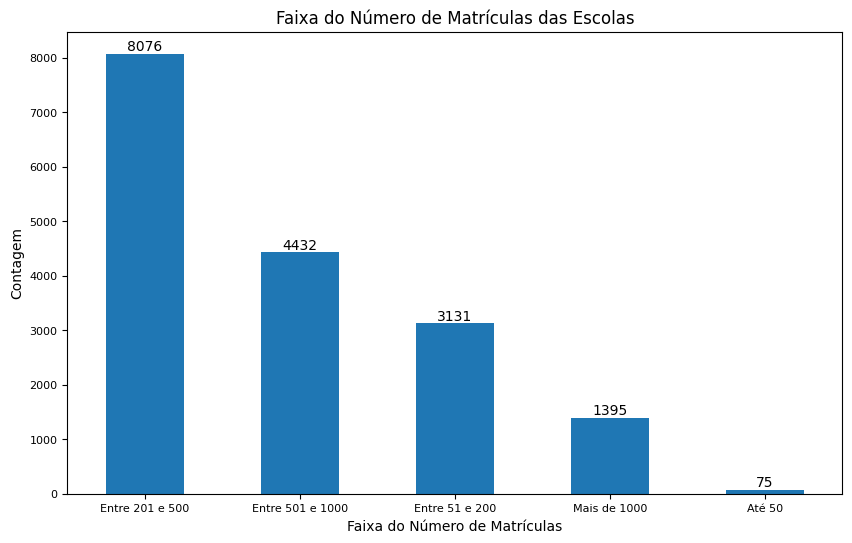

In [30]:
contagem_modalidades = td_dimensoes_fatores['porte_da_escola'].value_counts()

# Criar uma lista de rótulos personalizados removendo "de escolarização"
rotulos_personalizados = [x.replace(" matrículas de escolarização", "") for x in contagem_modalidades.index]

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8)
plt.title('Faixa do Número de Matrículas das Escolas') 
plt.xlabel('Faixa do Número de Matrículas') 
plt.ylabel('Contagem') 

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Usar rótulos personalizados
ax.set_xticklabels(rotulos_personalizados, rotation=0)

plt.show()


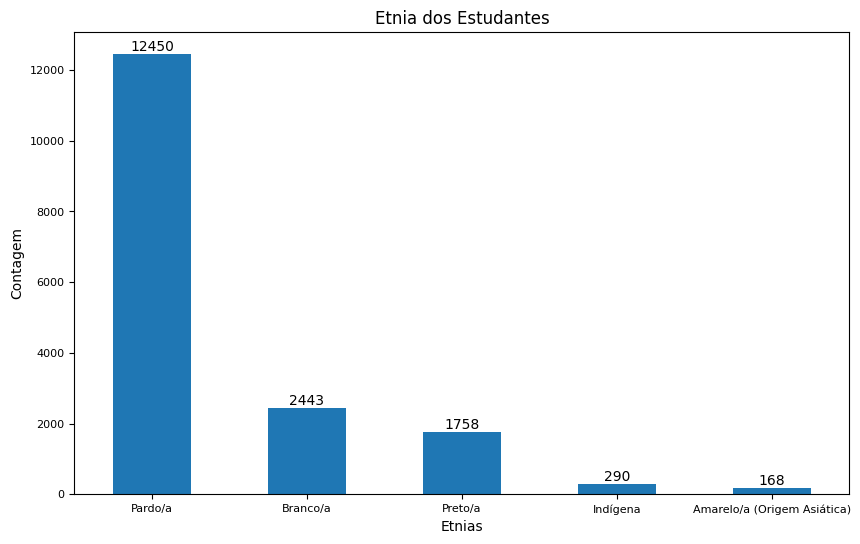

In [32]:
contagem_modalidades = td_dimensoes_fatores['etnia'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Etnia dos Estudantes') 
plt.xlabel('Etnias') 
plt.ylabel('Contagem') 
plt.xticks(rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.show()

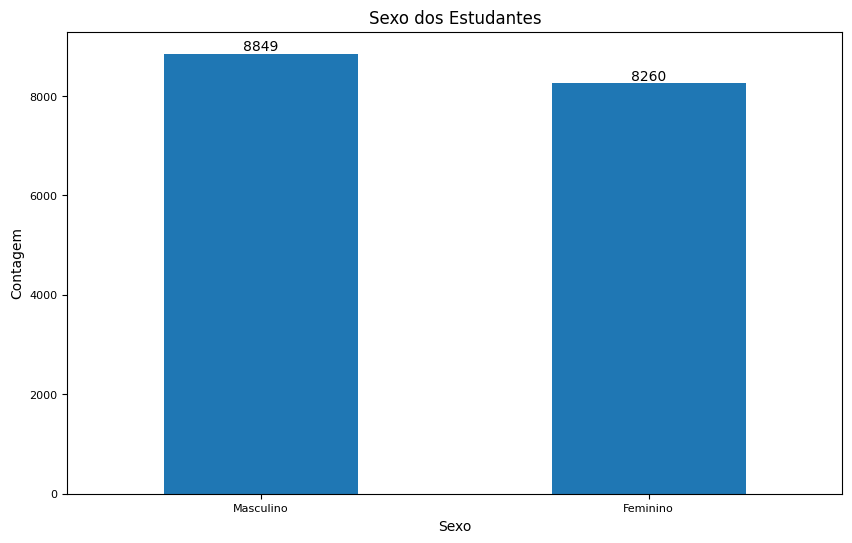

In [42]:
# Substituir os valores 1 e 2 por "masculino" e "feminino"
td_dimensoes_fatores['sexo'] = td_dimensoes_fatores['sexo'].replace({1: 'Masculino', 2: 'Feminino'})

contagem_modalidades = td_dimensoes_fatores['sexo'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Sexo dos Estudantes') 
plt.xlabel('Sexo') 
plt.ylabel('Contagem')

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


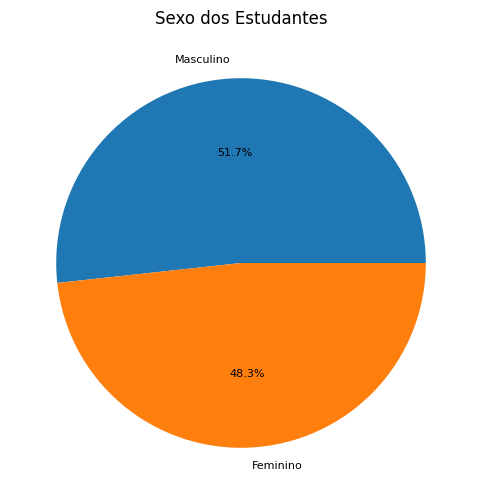

In [43]:
contagem_modalidades = td_dimensoes_fatores['sexo'].value_counts()

plt.figure(figsize=(10, 6))
contagem_modalidades.plot(kind='pie', autopct='%1.1f%%', fontsize=8)
plt.title('Sexo dos Estudantes')
plt.ylabel('')  # Remover o rótulo do eixo Y

plt.show()

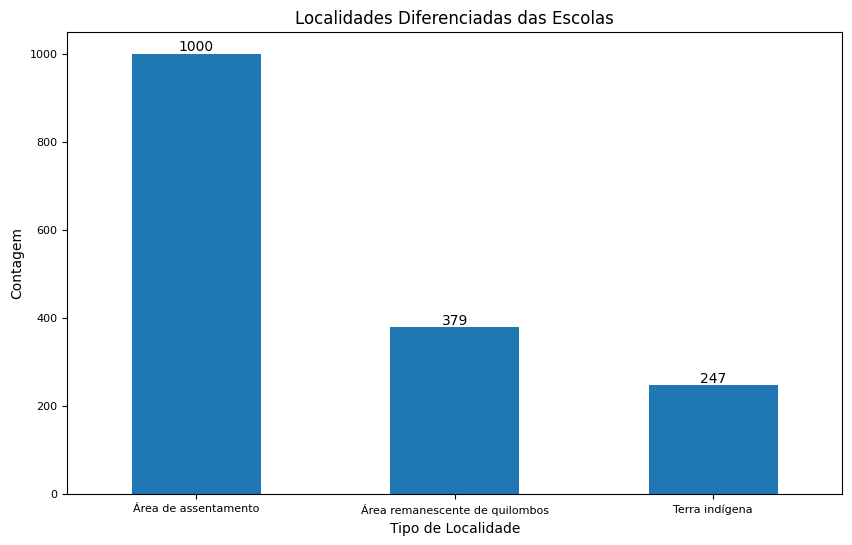

In [47]:
td_dimensoes_fatores_copy = td_dimensoes_fatores.copy()

indice_max = contagem_modalidades.idxmax()

td_dimensoes_fatores_copy = td_dimensoes_fatores_copy[td_dimensoes_fatores_copy['localidade_diferenciada'] != indice_max]

contagem_modalidades_copy = td_dimensoes_fatores_copy['localidade_diferenciada'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades_copy.plot(kind='bar', fontsize=8, rot=0)
plt.title('Localidades Diferenciadas das Escolas') 
plt.xlabel('Tipo de Localidade')
plt.ylabel('Contagem')

for i, v in enumerate(contagem_modalidades_copy):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

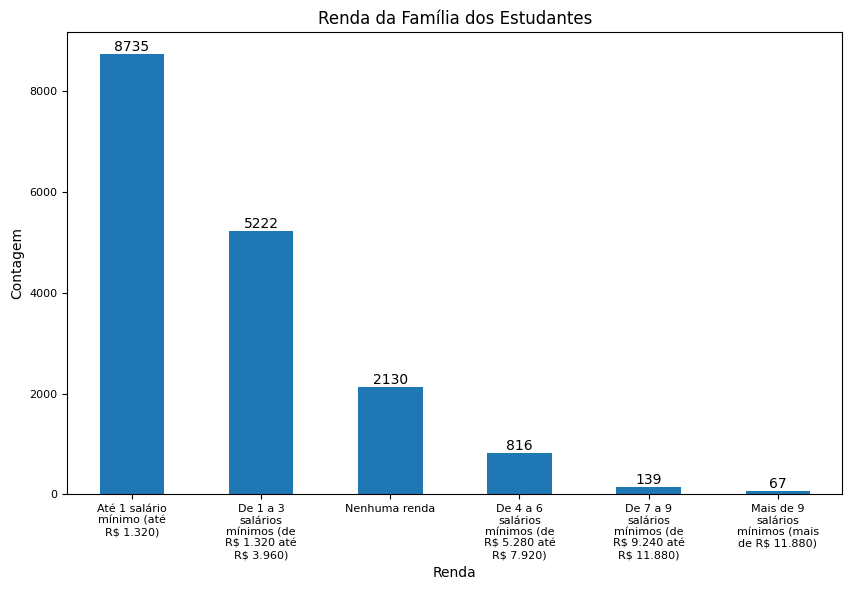

In [61]:
import textwrap

contagem_modalidades = td_dimensoes_fatores['renda'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Renda da Família dos Estudantes') 
plt.xlabel('Renda') 
plt.ylabel('Contagem')

limite_largura_coluna = 13

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_modalidades.index]
ax.set_xticklabels(rotulos_personalizados)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [63]:
td_dimensoes_fatores['nome_escola'].value_counts()


nome_escola
E M E I F VALDECI LIMA SOARES                         319
ESCOLA ESTADUAL JOAQUIM SOARES DA SILVA               285
COLEGIO ESTADUAL VEREADOR LUIZ DE ALMEIDA             248
ESCOLA MUNICIPAL MARIA DAS GRACAS RODRIGUES COELHO    181
EE JOAQUIM JOSE PEREIRA                               180
                                                     ... 
EM MANOEL FELIPE DE OLIVEIRA                            1
E M E F PADRE PEDRO HERMANS                             1
EE GABRIEL ODORICO                                      1
E M E I F SAO LUIZ GONZAGA                              1
E M E F PROFA FRANCISCA DE OLIVEIRA BLANCO              1
Name: count, Length: 306, dtype: int64

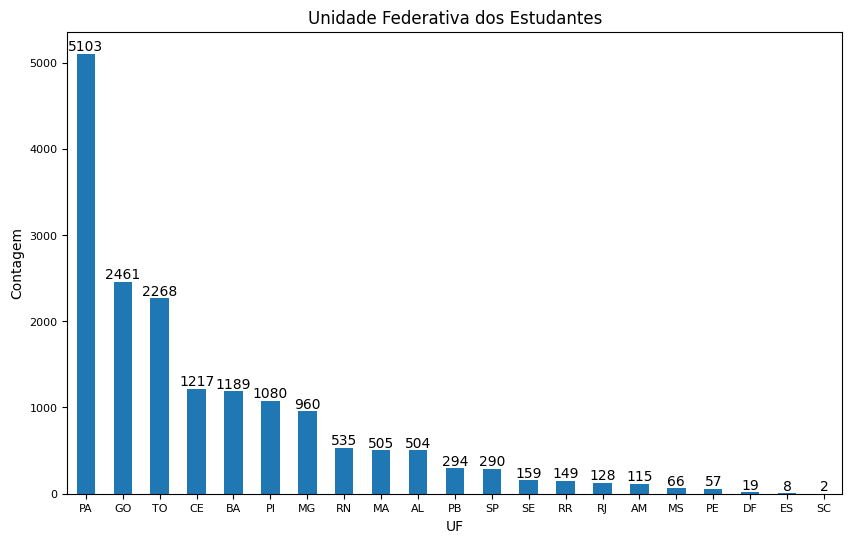

In [65]:
contagem_modalidades = td_dimensoes_fatores['uf'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)
plt.title('Unidade Federativa dos Estudantes') 
plt.xlabel('UF') 
plt.ylabel('Contagem')

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


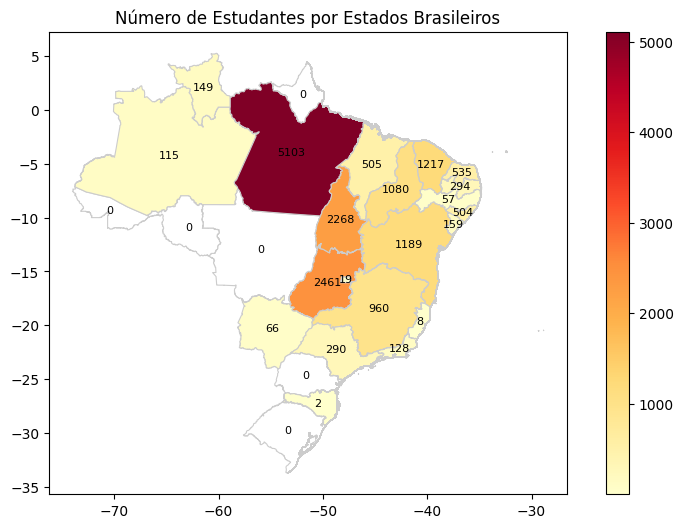

In [109]:
br_states = gpd.read_file('../../Databases/Geografia/brazil_geo.json')

estados_brasileiros = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']

contagem_modalidades = td_dimensoes_fatores['uf'].value_counts()
contagem_modalidades = pd.DataFrame({'uf - valor': contagem_modalidades}).reset_index()
contagem_modalidades.columns = ['uf', 'valor']

estados_zerados = {'uf': ['AC', 'AP', 'MT', 'PR', 'RS', 'RO'], 'valor': [0, 0, 0, 0, 0, 0]}
novo_df = pd.DataFrame(estados_zerados)

contagem_modalidades = pd.concat([contagem_modalidades, novo_df], ignore_index=True)

# print(contagem_modalidades)

df = contagem_modalidades.reset_index()
br_states = br_states.merge(df, left_on='id', right_on='uf')

cmap = plt.colormaps['YlOrRd']
cmap.set_under('white')

plt.figure(figsize=(10, 6))
br_states.plot(column='valor', cmap=cmap, linewidth=0.8, ax=plt.gca(), edgecolor='0.8', legend=True, vmin=1)

for idx, row in br_states.iterrows():
    state_name = row['uf']
    value = row['valor']
    centroid = row['geometry'].centroid
    plt.text(centroid.x, centroid.y, str(value), fontsize=8, ha='center', va='center')

plt.title('Número de Estudantes por Estados Brasileiros')
plt.show()

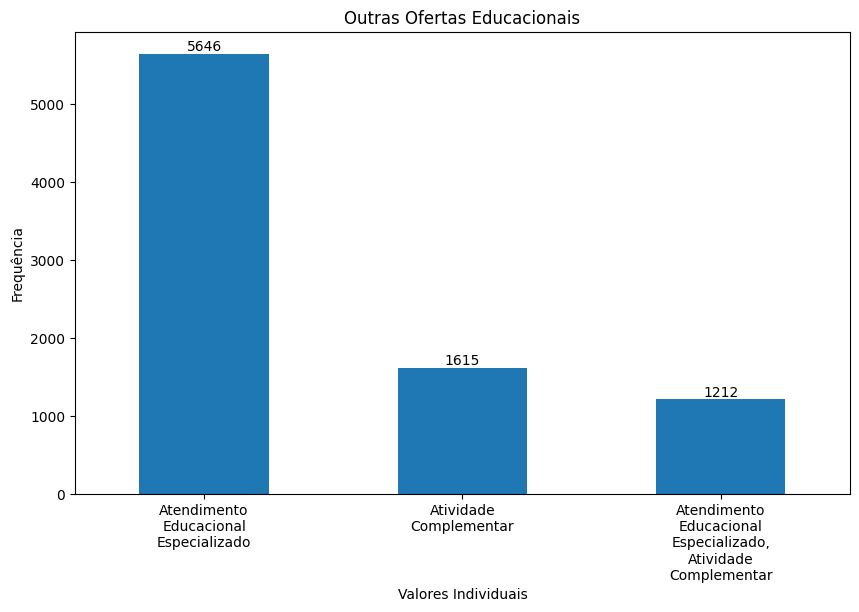

In [179]:
contagem_individual = td_dimensoes_fatores['outras_ofertas_educacionais'].value_counts()

plt.figure(figsize=(10, 6))
contagem_individual.plot(kind='bar')
plt.title('Outras Ofertas Educacionais')
plt.xlabel('Valores Individuais')
plt.ylabel('Frequência')

limite_largura_coluna = 15

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_individual.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_individual):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

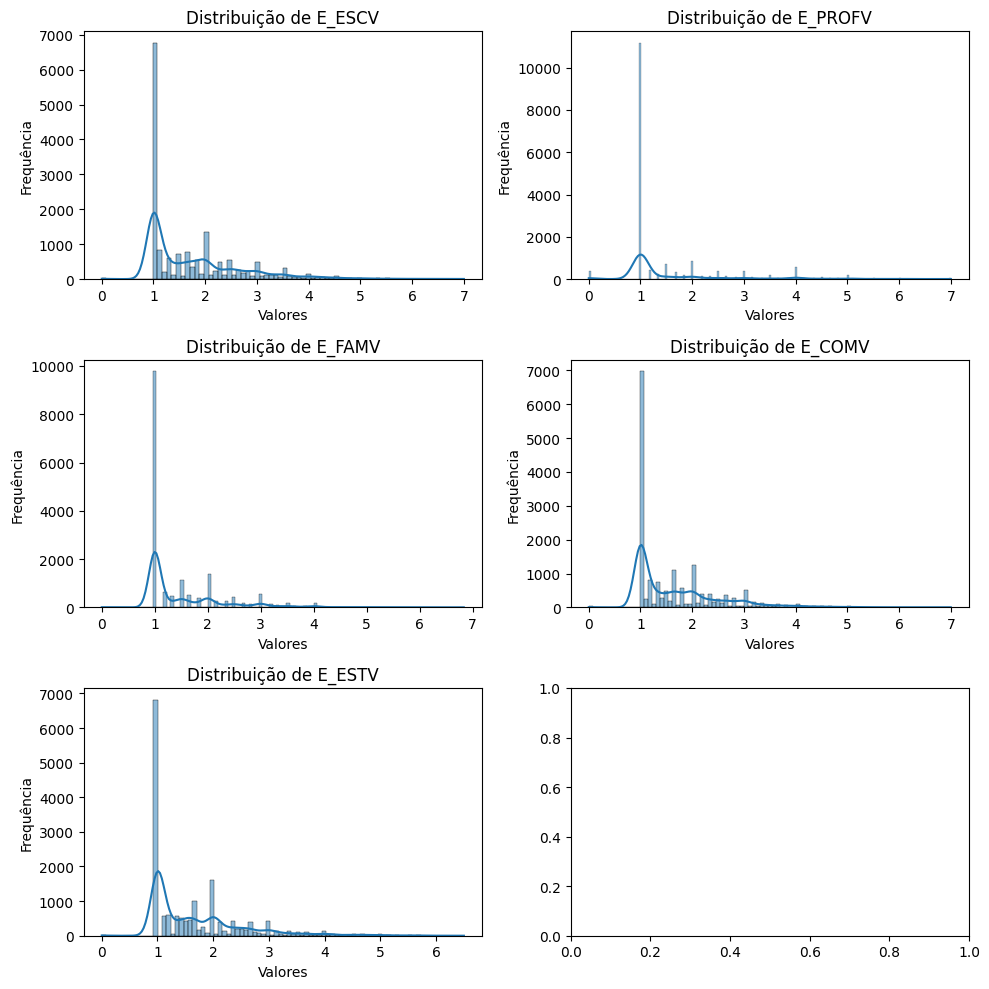

In [141]:
dimensoes_v = ['E_ESCV', 'E_PROFV', 'E_FAMV', 'E_COMV', 'E_ESTV']
df = td_dimensoes_fatores[dimensoes_v]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, fator in enumerate(dimensoes_v):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=fator, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

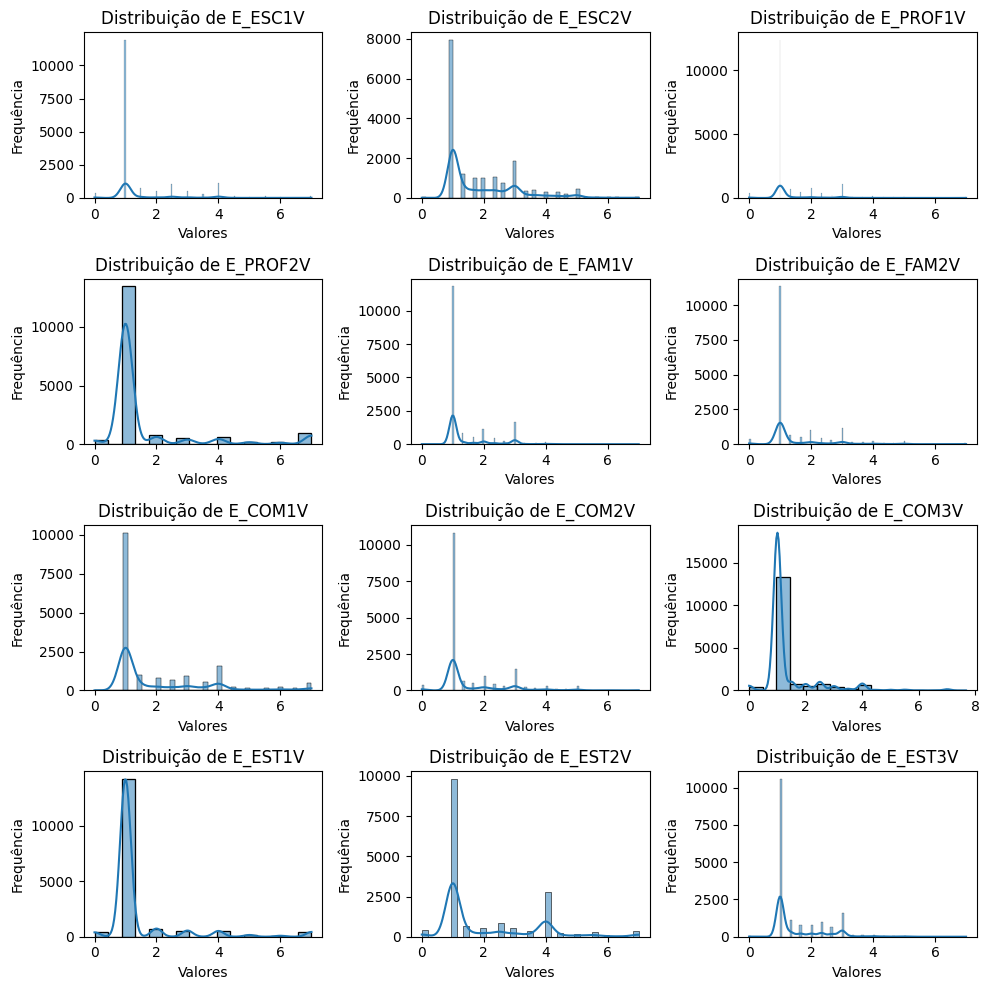

In [139]:
fatores_v = ["E_ESC1V","E_ESC2V","E_PROF1V","E_PROF2V","E_FAM1V","E_FAM2V","E_COM1V","E_COM2V","E_COM3V","E_EST1V","E_EST2V","E_EST3V"]
df = td_dimensoes_fatores[fatores_v]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i, fator in enumerate(fatores_v):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=fator, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {fator}')
    axes[row, col].set_xlabel('Valores')
    axes[row, col].set_ylabel('Frequência')

plt.tight_layout()
plt.show()